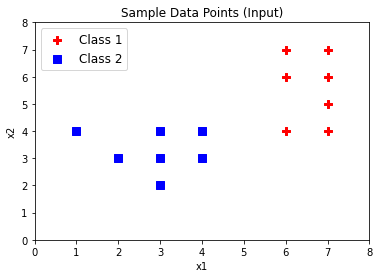

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("train_knn.txt", header = None, sep = ",")

dataset = dataset.iloc[:, :].values

myFig = plt.figure(figsize=[6,4])

plt.scatter([dataset[i][0] for i in range(len(dataset)) if dataset[i][2] == 1],
            [dataset[i][1] for i in range(len(dataset)) if dataset[i][2] == 1],
            color = "red", marker = "P", label = "Class 1", s = 60)

plt.scatter([dataset[i][0] for i in range(len(dataset)) if dataset[i][2] == 2],
            [dataset[i][1] for i in range(len(dataset)) if dataset[i][2] == 2],
            color = "blue", marker = "s", label = "Class 2", s = 60)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Sample Data Points (Input)")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

from google.colab import files
myFig.savefig("Assignment4_1.png")
files.download("Assignment4_1.png") 

3


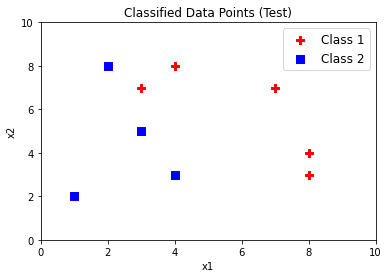

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test = pd.read_csv('test_knn.txt', header=None, sep=',')
test = np.array(test)

dtype = [('distance', int), ('class', int)]
class_1 = []
class_2 = []

k = int(input())

f = open("Prediction.txt", "w")
for i in range(len(test)):
  values = []
  for j in range(len(dataset)):
    x = dataset[j]
    values.append((((x[0]-test[i][0])**2 + (x[1]-test[i][1])**2), x[2]))
  knn = np.array(values, dtype)  
  knn = np.sort(knn, order = 'distance')
  class1 = 0
  class2 = 0
  f.write("Test Point : " + str(test[i]) + "\n")
  for j in range(k):
    f.write("Distance : " + str(knn[j][0]) + "    Class : " + str(knn[j][1]) + "\n")
    if knn[j][1] == 1:
      class1 = class1 + 1
    else:
      class2 = class2 + 1  
  if class1 > class2:
    class_1.append(test[i])
    f.write("Predicted Class : Class 1\n")
  else:
    class_2.append(test[i])  
    f.write("Predicted Class : Class 2\n")
    
f.close()   

myFig = plt.figure(figsize=[6,4])

plt.scatter([class_1[i][0] for i in range(len(class_1))],
            [class_1[i][1] for i in range(len(class_1))],
            color = "red", marker = "P", label = "Class 1", s = 60)

plt.scatter([class_2[i][0] for i in range(len(class_2))],
            [class_2[i][1] for i in range(len(class_2))],
            color = "blue", marker = "s", label = "Class 2", s = 60)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classified Data Points (Test)")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend(loc = 'best', fontsize = 12)
plt.show()

from google.colab import files
myFig.savefig("Assignment4_2.png")
files.download("Assignment4_2.png") 

